In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [2]:
df = pd.read_csv("C:\\Users\\TusharG\\Desktop\\Twitter_Data.csv\\Twitter_Data.csv")
df

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0
...,...,...
162975,why these 456 crores paid neerav modi not reco...,-1.0
162976,dear rss terrorist payal gawar what about modi...,-1.0
162977,did you cover her interaction forum where she ...,0.0
162978,there big project came into india modi dream p...,0.0


In [3]:
df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [4]:
df.tail()

,clean_text,category
162975,why these 456 crores paid neerav modi not reco...,-1.0
162976,dear rss terrorist payal gawar what about modi...,-1.0
162977,did you cover her interaction forum where she ...,0.0
162978,there big project came into india modi dream p...,0.0
162979,have you ever listen about like gurukul where ...,1.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB


In [6]:
df.shape

(162980, 2)

In [7]:
df.isnull().sum()

clean_text    4
category      7
dtype: int64

In [9]:
df.columns

Index(['clean_text', 'category'], dtype='object')

In [14]:
df = df.rename(columns={
    'clean_text': 'text',
    'category': 'sentiment'
})


In [15]:
df.dropna(inplace=True)

In [16]:
df.describe()

,sentiment
count,162969.000000
mean,0.225442
std,0.781279
min,-1.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [17]:
df['sentiment'].value_counts()

sentiment
 1.0    72249
 0.0    55211
-1.0    35509
Name: count, dtype: int64

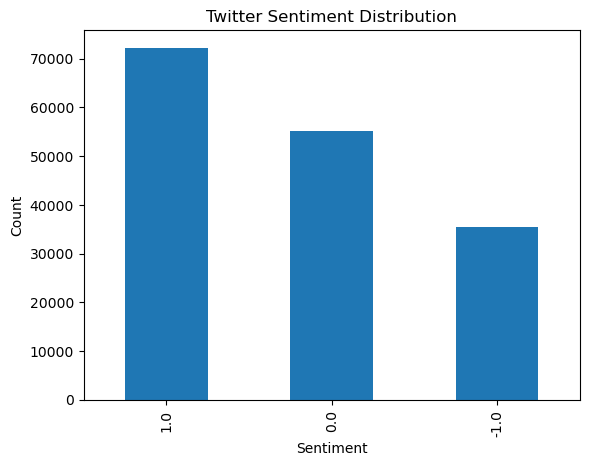

In [18]:
df['sentiment'].value_counts().plot(kind='bar')
plt.title("Twitter Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


In [19]:
def clean_tweet(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)
    text = re.sub(r"@\w+|#\w+", "", text)
    text = re.sub(r"[^a-z\s]", "", text)
    return text

df['clean_text'] = df['text'].apply(clean_tweet)
df.head()


,text,sentiment,clean_text
0,when modi promised “minimum government maximum...,-1.0,when modi promised minimum government maximum ...
1,talk all the nonsense and continue all the dra...,0.0,talk all the nonsense and continue all the dra...
2,what did just say vote for modi welcome bjp t...,1.0,what did just say vote for modi welcome bjp t...
3,asking his supporters prefix chowkidar their n...,1.0,asking his supporters prefix chowkidar their n...
4,answer who among these the most powerful world...,1.0,answer who among these the most powerful world...


In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

X = df['clean_text']
y = df['sentiment']

vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = vectorizer.fit_transform(X)

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y, test_size=0.2, random_state=42
)

In [22]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

nb_pred = nb_model.predict(X_test)

In [23]:
from sklearn.metrics import accuracy_score, classification_report

print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_pred))
print(classification_report(y_test, nb_pred))


Naive Bayes Accuracy: 0.7374056574829724
              precision    recall  f1-score   support

        -1.0       0.91      0.42      0.57      7152
         0.0       0.88      0.67      0.76     11067
         1.0       0.65      0.95      0.78     14375

    accuracy                           0.74     32594
   macro avg       0.81      0.68      0.70     32594
weighted avg       0.79      0.74      0.72     32594



In [24]:
from sklearn.svm import LinearSVC

svm_model = LinearSVC()
svm_model.fit(X_train, y_train)

svm_pred = svm_model.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, svm_pred))
print(classification_report(y_test, svm_pred))

SVM Accuracy: 0.9417377431429097
              precision    recall  f1-score   support

        -1.0       0.92      0.88      0.90      7152
         0.0       0.95      0.98      0.96     11067
         1.0       0.95      0.95      0.95     14375

    accuracy                           0.94     32594
   macro avg       0.94      0.93      0.94     32594
weighted avg       0.94      0.94      0.94     32594



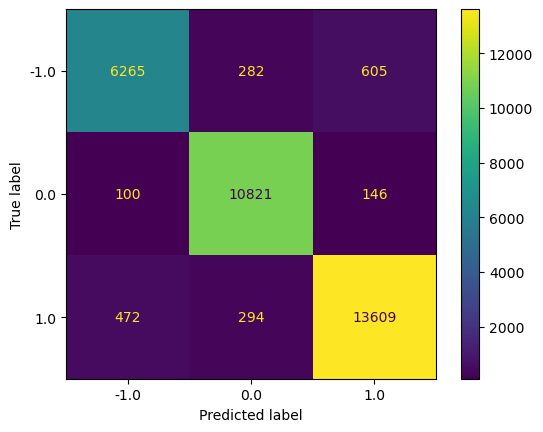

In [25]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, svm_pred)
plt.show()